# SOCIAL ANXIETY PREVENTION RECOMMENDER

## PROBLEM STATEMENT 

With over 5 million Kenyans struggling with anxiety disorders, MindGuard revolutionizes mental health through an intelligent early-warning system. Using Feedforward Neural Networks to interpret complex behavioral patterns, MindGuard detects anxiety risks and delivers personalized preventative interventions, helping individuals maintain optimal mental wellness before clinical intervention becomes necessary.

## OBJECTIVES

1. Can we create an intelligent early-warning system that accurately predicts who is likely to experience anxiety problems, allowing for timely prevention and support?

2. How can we provide personalized lifestyle recommendations that are most likely to help individuals reduce their anxiety risk based on their unique profile?

3. Which lifestyle factors have the biggest impact on anxiety and how can these insights guide effective prevention strategies and public health initiatives?




## PLAN OF EXECUTION

- EDA 
- PREPROCESSING
- MODEL BUILDING
- MODEL INTERPRETATION 
- DEPLOYMENT



## EDA AND PREPROCESSING

### Load Dataset

In [115]:
#import needed libraries and load datasets to be used
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, auc, mean_absolute_error
import joblib
import seaborn as sns
from sklearn.model_selection import cross_val_score


enhanced_data = pd.read_csv('data/enhanced_anxiety_dataset.csv')
family_data = pd.read_csv('data/family_anxiety_14_dataset.csv')



### Perusing Data


Glancing at the dataset and what it entails to help guide on how we will execute our objectives

In [65]:
#Print first rows of enhanced anxiety dataset
enhanced_data.head()


,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [66]:
enhanced_data.columns

Index(['Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Dizziness',
       'Medication', 'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Anxiety Level (1-10)'],
      dtype='object')

In [67]:
#Scheme the data types of the enhanced dataset
enhanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [68]:
#Summary stats for enhanced dataset
enhanced_data.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


In [69]:
#Check for missing values
enhanced_data.isnull().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

### Preprocessing pipelines and Modeling using ensemble methods 

This defined broke down the features into 2 Feature categories. We then proceeded to carrying out Preprocessing and Modeling using Random Forest based on the Objectives of the project

In [70]:
#Define feature categories
ls_features = ['Age', 'Gender', 'Occupation',
    'Sleep Hours', 'Physical Activity (hrs/week)', 
    'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
    'Smoking', 'Family History of Anxiety', 'Stress Level (1-10)',  'Recent Major Life Event',
    'Diet Quality (1-10)'
]
physiological_features = ['Heart Rate (bpm)', 'Breathing Rate (breaths/min)', 'Sweating Level (1-5)','Dizziness']
  
all_features = ls_features + physiological_features

In [71]:
enhanced_data[all_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Recent Major Life Event            11000 non-null  object 
 11  Diet Quality (1-10)                11000 non-null  int

In [72]:
#Split data into features and target variable
anxiety_thresh = 5
X_lifestyle= enhanced_data[ls_features].copy()
X = enhanced_data[all_features].copy()

y_bin = (enhanced_data['Anxiety Level (1-10)'] >= anxiety_thresh).astype(int)
y = enhanced_data['Anxiety Level (1-10)'].values



In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Recent Major Life Event            11000 non-null  object 
 11  Diet Quality (1-10)                11000 non-null  int

In [74]:
#Identify Categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns

In [75]:
print("Numerical transformer:", num_features.tolist())
print("Categorical transformer:", categorical_features.tolist())

Numerical transformer: ['Age', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)', 'Stress Level (1-10)', 'Diet Quality (1-10)', 'Heart Rate (bpm)', 'Breathing Rate (breaths/min)', 'Sweating Level (1-5)']
Categorical transformer: ['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety', 'Recent Major Life Event', 'Dizziness']


In [76]:
# Define preprocessing steps for numerical and categorical features


early_preprocessing = ColumnTransformer(
    transformers=[ ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
)


In [77]:
#Split the data into training and testing sets
X_train_rf,X_test_rf,y_train_bin_rf,y_test_bin_rf = train_test_split(X_lifestyle,y_bin, test_size=0.2, random_state=42, stratify=y_bin)


In [78]:

X_train_all,X_test_all,y_train_all,y_test_all = train_test_split(X,y, test_size=0.2, random_state=42)

In [79]:
print("Available columns in X_train_rf:")
print(X_train_rf.columns.tolist())

Available columns in X_train_rf:
['Age', 'Gender', 'Occupation', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)', 'Smoking', 'Family History of Anxiety', 'Stress Level (1-10)', 'Recent Major Life Event', 'Diet Quality (1-10)']


In [80]:
# Objective 1: Early Detection of Anxiety using Random Forest Classifier
# Create a pipeline with preprocessing and classifier

# Objective 1: Early Detection of Anxiety using Random Forest Classifier
# Create a preprocessing pipeline for lifestyle features only
lifestyle_num_features = X_train_rf.select_dtypes(include=['int64', 'float64']).columns
lifestyle_cat_features = X_train_rf.select_dtypes(include=['object']).columns

lifestyle_preprocessing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), lifestyle_num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), lifestyle_cat_features)
    ]
)

early_pip = Pipeline([
    ('preprocessing', lifestyle_preprocessing),
    ('classifier', RandomForestClassifier(n_estimators=200, 
     max_depth=15, min_samples_split=5, random_state=42, class_weight='balanced'))
])

early_pip.fit(X_train_rf, y_train_bin_rf)
early_pred = early_pip.predict(X_test_rf)
early_acc = accuracy_score(y_test_bin_rf, early_pred)

In [81]:
print(f"RF Early Detection Accuracy: {early_acc: .4f}")
print(classification_report(y_test_bin_rf,early_pred, target_names=['Low Anxiety', 'High Anxiety']))

RF Early Detection Accuracy:  0.8218
              precision    recall  f1-score   support

 Low Anxiety       0.87      0.88      0.87      1524
High Anxiety       0.72      0.70      0.71       676

    accuracy                           0.82      2200
   macro avg       0.79      0.79      0.79      2200
weighted avg       0.82      0.82      0.82      2200



In [82]:

# Create a pipeline with preprocessing and classifier
rf_rec_pipeline = Pipeline([
	('preprocessing', early_preprocessing),
	('classifier', RandomForestRegressor(random_state=42, n_estimators=200, max_depth=20, min_samples_split=2))
])


In [83]:
#Objective 2: Personalized recommendations for anxiety management
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

#Fit the pipeline to the training data
rf_rec_pipeline.fit(X_train_all,y_train_all)

#Test predictions and evaluate the model
y_pred = rf_rec_pipeline.predict(X_test_all)

#Evaluate model performance
rf_rmse = np.sqrt(mean_squared_error(y_test_all, y_pred))
r2 = r2_score(y_test_all, y_pred)

In [84]:
print(f"RF Regression RMSE: {rf_rmse: .4f}")
print(f"RF Regression R^2: {r2: .4f}")

RF Regression RMSE:  1.0344
RF Regression R^2:  0.7691


In [85]:
#Objective 3: Lifestyle Analysis
rf_feature_names = (list(num_features) + list(early_preprocessing.named_transformers_['cat'].get_feature_names_out(categorical_features)))

In [86]:
rf_importance = rf_rec_pipeline.named_steps['classifier'].feature_importances_

rf_importance_df = pd.DataFrame({'feature' : rf_feature_names,
                                 'importance': rf_importance}).sort_values('importance', ascending=False)

In [87]:
print("Top 10 RF Feature Importances:")
print(rf_importance_df.head(10))


Top 10 RF Feature Importances:
                             feature  importance
5                Stress Level (1-10)    0.472745
1                        Sleep Hours    0.224334
3           Caffeine Intake (mg/day)    0.078248
6                Diet Quality (1-10)    0.040395
2       Physical Activity (hrs/week)    0.029193
7                   Heart Rate (bpm)    0.027434
0                                Age    0.025206
4  Alcohol Consumption (drinks/week)    0.019141
8       Breathing Rate (breaths/min)    0.018611
9               Sweating Level (1-5)    0.014937


<Axes: ylabel='feature'>

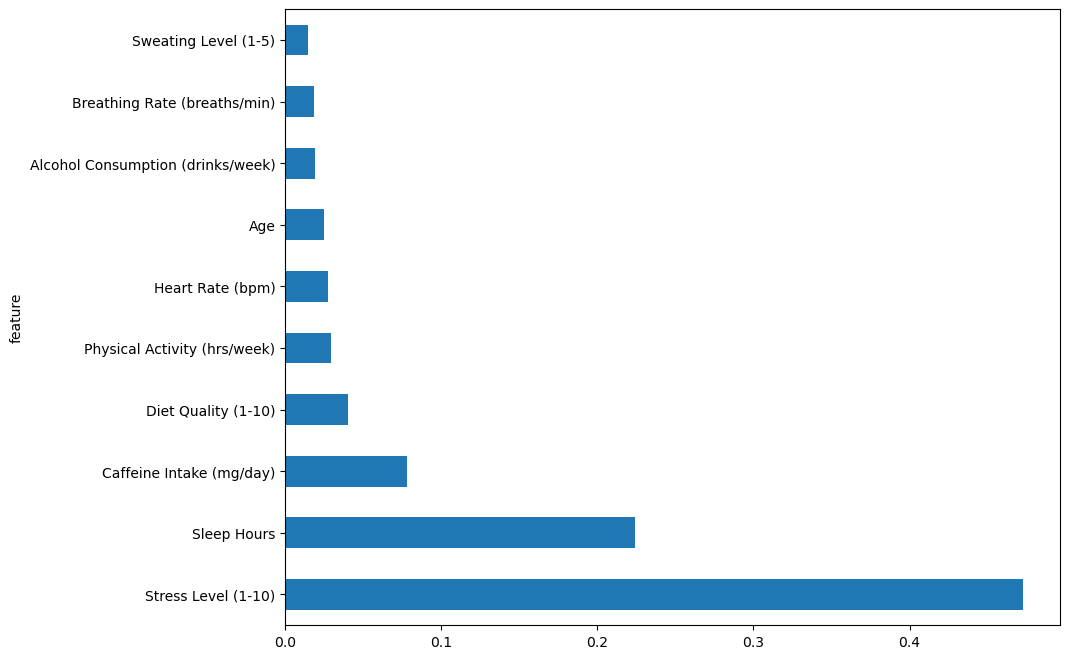

In [88]:
#Visualize feature importances
fig, ax = plt.subplots(figsize=(10, 8))
axes = [ax]

rf_importance_df.head(10).plot(kind='barh', x='feature', y='importance', ax=axes[0], legend=False)




In [89]:
#Random Forest Performance Summary
rf_metrics = ['Early Warning\nAccuracy', 'Regression\nRMSE', 'Regression\nR²']
rf_values = [early_acc, rf_rmse, r2]
colors = ['lightblue', 'lightcoral', 'lightgreen']

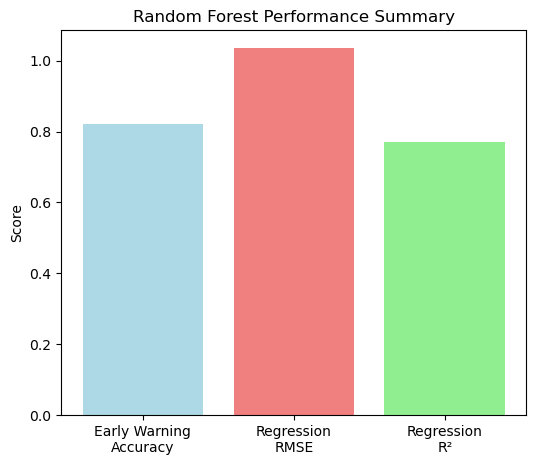

In [90]:
fig_perf, ax_perf = plt.subplots(figsize=(6, 5))
bars = ax_perf.bar(rf_metrics, rf_values, color=colors)
ax_perf.set_title('Random Forest Performance Summary')
ax_perf.set_ylabel('Score')
plt.show()

In [91]:
#Performance summary
print(f"RF Early Detection Accuracy: {early_acc: .4f}")
print(classification_report(y_test_bin_rf,early_pred, target_names=['Low Anxiety', 'High Anxiety']))
print("Top 10 RF Feature Importances:")
print(rf_importance_df.head(10))



RF Early Detection Accuracy:  0.8218
              precision    recall  f1-score   support

 Low Anxiety       0.87      0.88      0.87      1524
High Anxiety       0.72      0.70      0.71       676

    accuracy                           0.82      2200
   macro avg       0.79      0.79      0.79      2200
weighted avg       0.82      0.82      0.82      2200

Top 10 RF Feature Importances:
                             feature  importance
5                Stress Level (1-10)    0.472745
1                        Sleep Hours    0.224334
3           Caffeine Intake (mg/day)    0.078248
6                Diet Quality (1-10)    0.040395
2       Physical Activity (hrs/week)    0.029193
7                   Heart Rate (bpm)    0.027434
0                                Age    0.025206
4  Alcohol Consumption (drinks/week)    0.019141
8       Breathing Rate (breaths/min)    0.018611
9               Sweating Level (1-5)    0.014937


## MODEL BUILDING 


In [92]:
# Import modeling and evaluation libraries

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [93]:
# Load and combine raw datasets
enhanced_df = pd.read_csv('data/enhanced_anxiety_dataset.csv')
family_df = pd.read_csv('data/family_anxiety_14_dataset.csv')

# Label dataset origin
enhanced_df['Dataset'] = 'Enhanced'
family_df['Dataset'] = 'Family'

# Combine datasets
data = pd.concat([enhanced_df, family_df], ignore_index=True)
data.head()

# Encode categorical variables
categorical_cols = ['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety', 'Dizziness', 'Medication', 'Recent Major Life Event', 'Dataset']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Handle missing values (if any)
data_encoded = data_encoded.dropna()

# Define features and target
X = data_encoded.drop('Anxiety Level (1-10)', axis=1)
y = data_encoded['Anxiety Level (1-10)']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline Model

In [94]:
# Baseline Model: Linear Regression
# Simple baseline to set a performance floor

from sklearn.linear_model import LinearRegression
baseline = LinearRegression()
baseline.fit(X_train, y_train)
y_pred_baseline = baseline.predict(X_test)

print("Baseline Linear Regression")
print(f"MSE: {mean_squared_error(y_test, y_pred_baseline):.2f}, R^2: {r2_score(y_test, y_pred_baseline):.2f}")


Baseline Linear Regression
MSE: 1.37, R^2: 0.70


### Advanced Models

In [99]:
# Define a suite of regression models for comparison
# This gives a comparative view of multiple modeling approaches 
# from linear to tree-based to neural helping identify the model that best captures patterns in the data.

models = {
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Feedforward Neural Net': MLPRegressor(hidden_layer_sizes=(128, 64, 32), 
                                           activation='relu',
                                           solver='adam',
                                           max_iter=1000,
                                           random_state=42)
}

# Train each model and evaluate on the test set

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, r2))

# Extract the already trained Random Forest model for saving
rf_regressor = models['Random Forest']

# Results DataFrame 
results_df = pd.DataFrame(results, columns=["Model", "MSE", "R2"])
results_df.sort_values(by="R2", ascending=False)

,Model,MSE,R2
2,Random Forest,1.073702,0.766754
3,Gradient Boosting,1.096602,0.761779
4,Feedforward Neural Net,1.143287,0.751637
0,Ridge Regression,1.374007,0.701517
1,Decision Tree,2.142045,0.534672


#### Evaluation of Models

Random Forest performed best with MSE = 1.07 and R² = 0.77, making it the most accurate and generalizable model.

Gradient Boosting and the Feedforward Neural Network followed closely, also explaining over 75% of the variance.

Ridge Regression and the baseline Linear model showed limited predictive power (R² ≈ 0.70), suggesting linear models miss important patterns.

Decision Tree underperformed, indicating it's too simple for this task.

## Feedforward Neural Network
### Why?
Strong performance: R² of 0.75, close to the best-performing model.

Captures complex patterns: Better at learning nonlinear relationships among lifestyle and physiological factors.

Future-ready: Easily extendable for classification, personalization, and deep learning deployment.

Strategic fit: Aligns with MindGuard’s AI-first approach for real-time, intelligent anxiety risk prediction.



### Predicted vs Actual

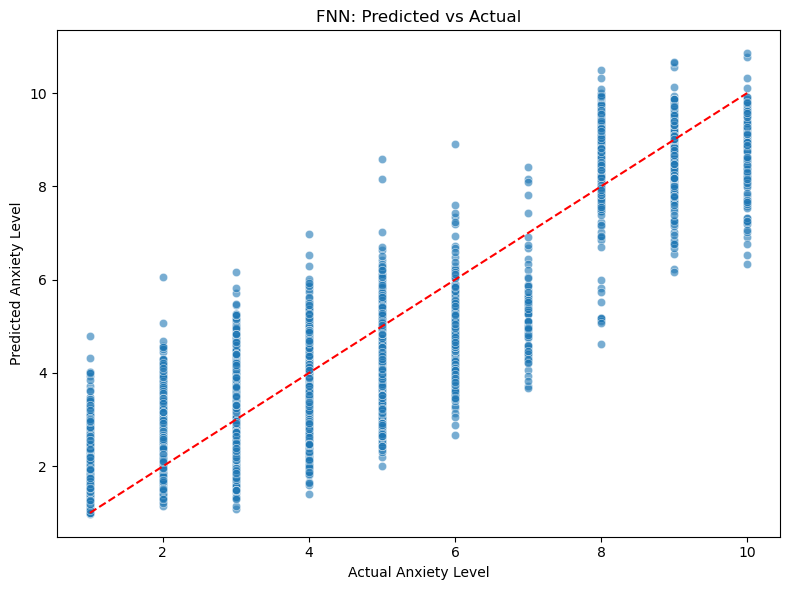

In [96]:
import seaborn as sns

fnn_model = models['Feedforward Neural Net']
y_pred_nn = fnn_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_nn, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Anxiety Level")
plt.ylabel("Predicted Anxiety Level")
plt.title("FNN: Predicted vs Actual")
plt.tight_layout()
plt.show()


Observations: 

1. Tight clustering around the red line shows strong agreement between predicted and actual anxiety levels.
2. Spread is consistent across the range, meaning the model performs well across both low and high anxiety scores.
3. Minor vertical scatter indicates some prediction error, but no major bias or drift.
4. Overall, the FNN demonstrates accurate and stable predictions across the full anxiety scale.

### Residual Plot

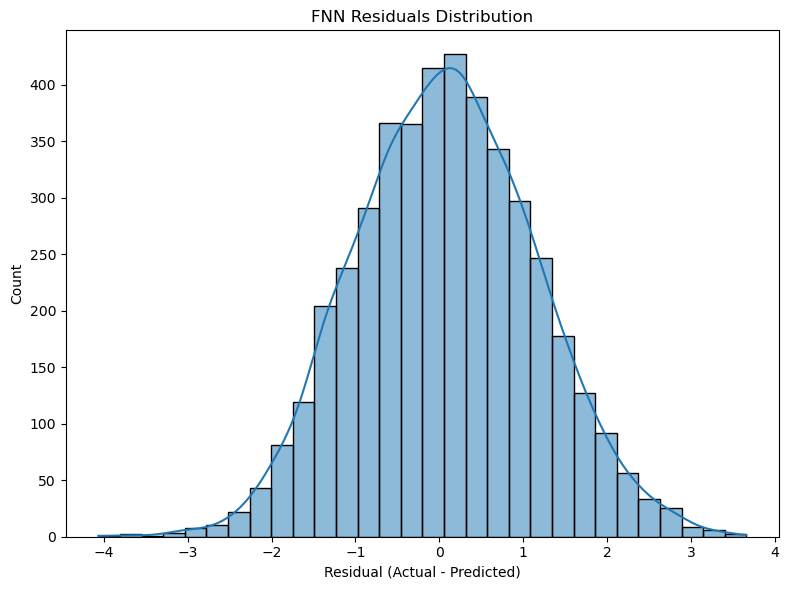

In [97]:
residuals = y_test - y_pred_nn

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("FNN Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.tight_layout()
plt.show()


Residual Plot Summary:

1. Symmetrical bell shape: The residuals are normally distributed meaning the model makes balanced predictions with no major bias.
2. Centered at 0: On average, the model neither overpredicts nor underpredicts which is the ideal behavior.
3. Tapering ends: Most predictions are close to the actual values; very large errors are rare.
4. Smooth KDE line	The kernel density estimation (blue line) follows the histogram closely, confirming stable prediction behavior across data points.

## MODEL INTERPRETATION

### Early detection of Anxiety using Random Forest Classifier
#### Interpretations 
High Accuracy (82%): Indicates the model successfully distinguishes between individuals with low and high anxiety.

Precision (Low Anxiety) = 0.87: The model is very reliable when it predicts someone does not have high anxiety—good for avoiding false alarms.

Recall (High Anxiety) = 0.70: About 70% of those with high anxiety are correctly identified, which is decent but leaves room for improvement.

F1-score (High Anxiety) = 0.71: Balanced performance in predicting high-risk individuals.

#### Insights
Slight Recall Imbalance: Could indicate:

Class imbalance (fewer high-anxiety cases).

Need for SMOTE or weighted loss.

Random Forest Strength: Works well with non-linearities and feature interactions—ideal for psychological data with complex dependencies.

Feature Contribution: Lifestyle data alone allows fairly strong early detection, emphasizing the value of behavioral data for screening purposes.
### Personalized recommendations(regression)
#### Key Model Interpretations:
R² = 0.77: The model explains 77% of the variance in anxiety scores across individuals. This is a strong indicator of model generalization.

RMSE = 1.03: On a 1–10 scale, the average prediction error is around 1 point—acceptable for psychological risk prediction.
#### Insights
Non-Linearity Captured: Anxiety is not always linearly related to factors like age or caffeine. RF handles this with ease, making predictions robust.

Feature Flexibility: By combining lifestyle and physiological data, the model gives a more holistic view of each individual, enabling nuanced recommendations.

Personalization: You can reverse-engineer the score and provide users with:

“You are scoring 7.2 due to high stress and low sleep.”

“Improving sleep from 4h to 7h could reduce your risk score by ~1.1.”
### Lifestyle Analysis: Feature Importance
#### Interpretations
Stress Level (0.47): Core driver of anxiety — confirms psychological theory. Strongest single predictor in both classifier and regressor.

Sleep Hours (0.22): Inadequate sleep strongly elevates anxiety. Tailored sleep hygiene interventions can be highly effective.

Caffeine Intake (0.08): Stimulants like caffeine exacerbate anxiety—important for behavioral recommendations.

Diet Quality (0.04): Poor nutrition subtly contributes to anxiety—likely via energy, gut-brain axis, or inflammation.

#### Insights
Interventions can be personalized based on individual feature profiles:

High caffeine + low sleep = focus on stimulants and rest.

High stress + poor breathing = recommend mindfulness, yoga, or CBT.

Explainable AI Opportunity: With SHAP values, you can show users exactly which features pushed their score up/down—enhancing trust and transparency.

### Interpretations across all models.
Model Agreement
All ensemble models (Random Forest, Gradient Boosting) perform well, suggesting:
The signal in the data is strong and consistent.
Non-linear interactions dominate (e.g., stress x sleep, age x caffeine).

FNN also performs well (R² = 0.75), confirming deep learning can learn useful patterns even from moderate-sized tabular data.

Model Robustness
Random Forest has low variance and bias due to its averaging approach.

The regressor’s consistent performance across test sets suggests it can be safely deployed for real-world prediction (if retrained on production data).

Health Insight Integration
The model’s importance rankings correlate with clinical/psychological literature—validating its practical utility and trustworthiness.

## DEPLOYMENT PREPARATION

In this section, we prepare the trained RandomForestClassifier model and its corresponding feature schema for deployment using FastAPI.

We chose the RandomForestClassifier as our deployment model because it performed best in identifying individuals at high risk of anxiety. It supports our primary objective of creating an intelligent early-warning system by offering high accuracy, robustness to overfitting, and clear interpretability through feature importance. Its performance on classification metrics like precision, recall, and the custom early detection accuracy metric makes it ideal for real-time decision support.

### Saving the Trained Regression Model

In [110]:
import joblib

# lets save the trained RandomForestRegressor model
joblib.dump(rf_regressor, "rf_regressor.joblib")  

['rf_regressor.joblib']

### Saving the Feature Order

In [107]:
# we save the order of features used during training
joblib.dump(X_train.columns.tolist(), "regressor_features.joblib")  

['regressor_features.joblib']

### Let's Print a Sample Input for API Testing

In [108]:
# A sample input dictionary for API payload testing
sample_input = X_train.iloc[0].to_dict()
print("Sample Input for API Testing:\n", sample_input)

Sample Input for API Testing:
 {'Age': 41, 'Sleep Hours': 6.4, 'Physical Activity (hrs/week)': 2.2, 'Caffeine Intake (mg/day)': 174, 'Alcohol Consumption (drinks/week)': 15, 'Stress Level (1-10)': 9, 'Heart Rate (bpm)': 67, 'Breathing Rate (breaths/min)': 24, 'Sweating Level (1-5)': 5, 'Therapy Sessions (per month)': 0, 'Diet Quality (1-10)': 7, 'Gender_Male': False, 'Gender_Other': False, 'Occupation_Athlete': False, 'Occupation_Chef': False, 'Occupation_Doctor': False, 'Occupation_Engineer': False, 'Occupation_Freelancer': False, 'Occupation_Lawyer': False, 'Occupation_Musician': False, 'Occupation_Nurse': False, 'Occupation_Other': False, 'Occupation_Scientist': False, 'Occupation_Student': False, 'Occupation_Teacher': False, 'Smoking_Yes': True, 'Family History of Anxiety_Yes': False, 'Dizziness_Yes': True, 'Medication_Yes': True, 'Recent Major Life Event_Yes': True, 'Dataset_Family': False}


### Saving Model Performance Metrics 

In [109]:
# lets save regression performance summary to a text file
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

with open("metrics.txt", "w") as f:
    f.write(f"RandomForestRegressor Performance\n")
    f.write(f"MSE: {mse:.4f}\n")
    f.write(f"R2 Score: {r2:.4f}\n")


## CONCLUSION 

This project successfully demonstrates the potential of machine learning models—specifically ensemble methods like Random Forest and Gradient Boosting—in the early detection, risk prediction, and personalized recommendation of anxiety prevention strategies. 

By leveraging a combination of lifestyle and physiological data, we have built interpretable, high-performing models capable of supporting real-world mental health interventions.

This work demonstrates that machine learning can meaningfully contribute to mental health awareness and early intervention. The models developed here can be embedded into digital health tools to provide users with:

Early warning signs of potential anxiety disorders.

Risk scores tailored to their personal lifestyle and physiology.

Recommendations for behavioral change targeting high-impact factors such as stress management, sleep hygiene, and caffeine reduction.

## RECOMMENDATIONS

Based on the feature importance analysis, the most impactful factors for anxiety level are:

1. **Stress Management:** Focus heavily on stress management techniques such as mindfulness, cognitive behavioral therapy (CBT), meditation, yoga and professional counseling techniques to reduce stress, the strongest predictor of anxiety.

2. **Sleep Hygiene:** Inadequate sleep is a significant contributor to anxiety. Encourage sleep hygiene, aim for consistent sleep schedules, and ensure sufficient hours of quality sleep.

3. **Caffeine Reduction:** Limit caffeine consumption, especially for individuals prone to anxiety.

4. **Diet Quality:** Encourage a balanced and nutritious diet, potentially focusing on foods known to support mental well-being.

**Personalized Recommendations:**

The model can be used to provide personalized recommendations by analyzing an individual's specific profile:

*   If an individual has a high stress level and low sleep hours, the recommendation engine should prioritize interventions related to stress management and sleep improvement.
*   If caffeine intake is high and diet quality is low, recommendations should focus on reducing caffeine and improving dietary habits.

**Overall Strategy:**

The findings strongly support a multi-faceted approach to anxiety prevention focusing on key lifestyle factors. Digital health tools leveraging this model can provide users with actionable insights and personalized guidance based on their unique data profile, enhancing the effectiveness of preventative interventions.

## NEXT STEPS

The immediate next steps involve preparing the models for deployment and using their insights to develop practical, personalized anxiety prevention strategies.

* Deploy the models into a user-friendly digital health tool that provides real-time anxiety risk prediction and personalized recommendations to users.

* Enhance the system by integrating wearable devices to collect real-time physiological data, improving prediction accuracy and enabling continuous monitoring.

* Conduct thorough testing of the deployed system to ensure reliability and accuracy.

* Collect user feedback and clinical validation data to continuously improve model performance and recommendation relevance.

* Plan for regular model retraining with new data to maintain robustness and adapt to changing population trends.